# Exploratory Data Analysis (EDA) Image Properties 

## Emotion Face Classifier Notebook 3

Generates example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd
import itertools

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.preprocessing import (
    preprocess_images,
    plot_face_matrix
)

In [6]:
from utils.image_properties import (
    generate_sample_images,
    generate_pixel_intensities,
    generate_composite_faces
)

In [7]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [8]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [9]:
# Select training data
print(fer2013.shape)
train_df = fer2013[fer2013['usage']=='Training']
print(train_df.shape)

(35887, 9)
(28709, 9)


In [10]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [11]:
# Get subset of emo-color mappings
color_dict = common_dicts['color_dict']
color_dict

{'Overall': 'black',
 'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [12]:
emo_samples = generate_sample_images(train_df, n=5, cat_col='emotion', path_col='img_path')

In [13]:
sample_imgs_save_path = os.path.join('imgs', 'comparisons', 'sample_images.png')

Plot saved to imgs/comparisons/sample_images.png


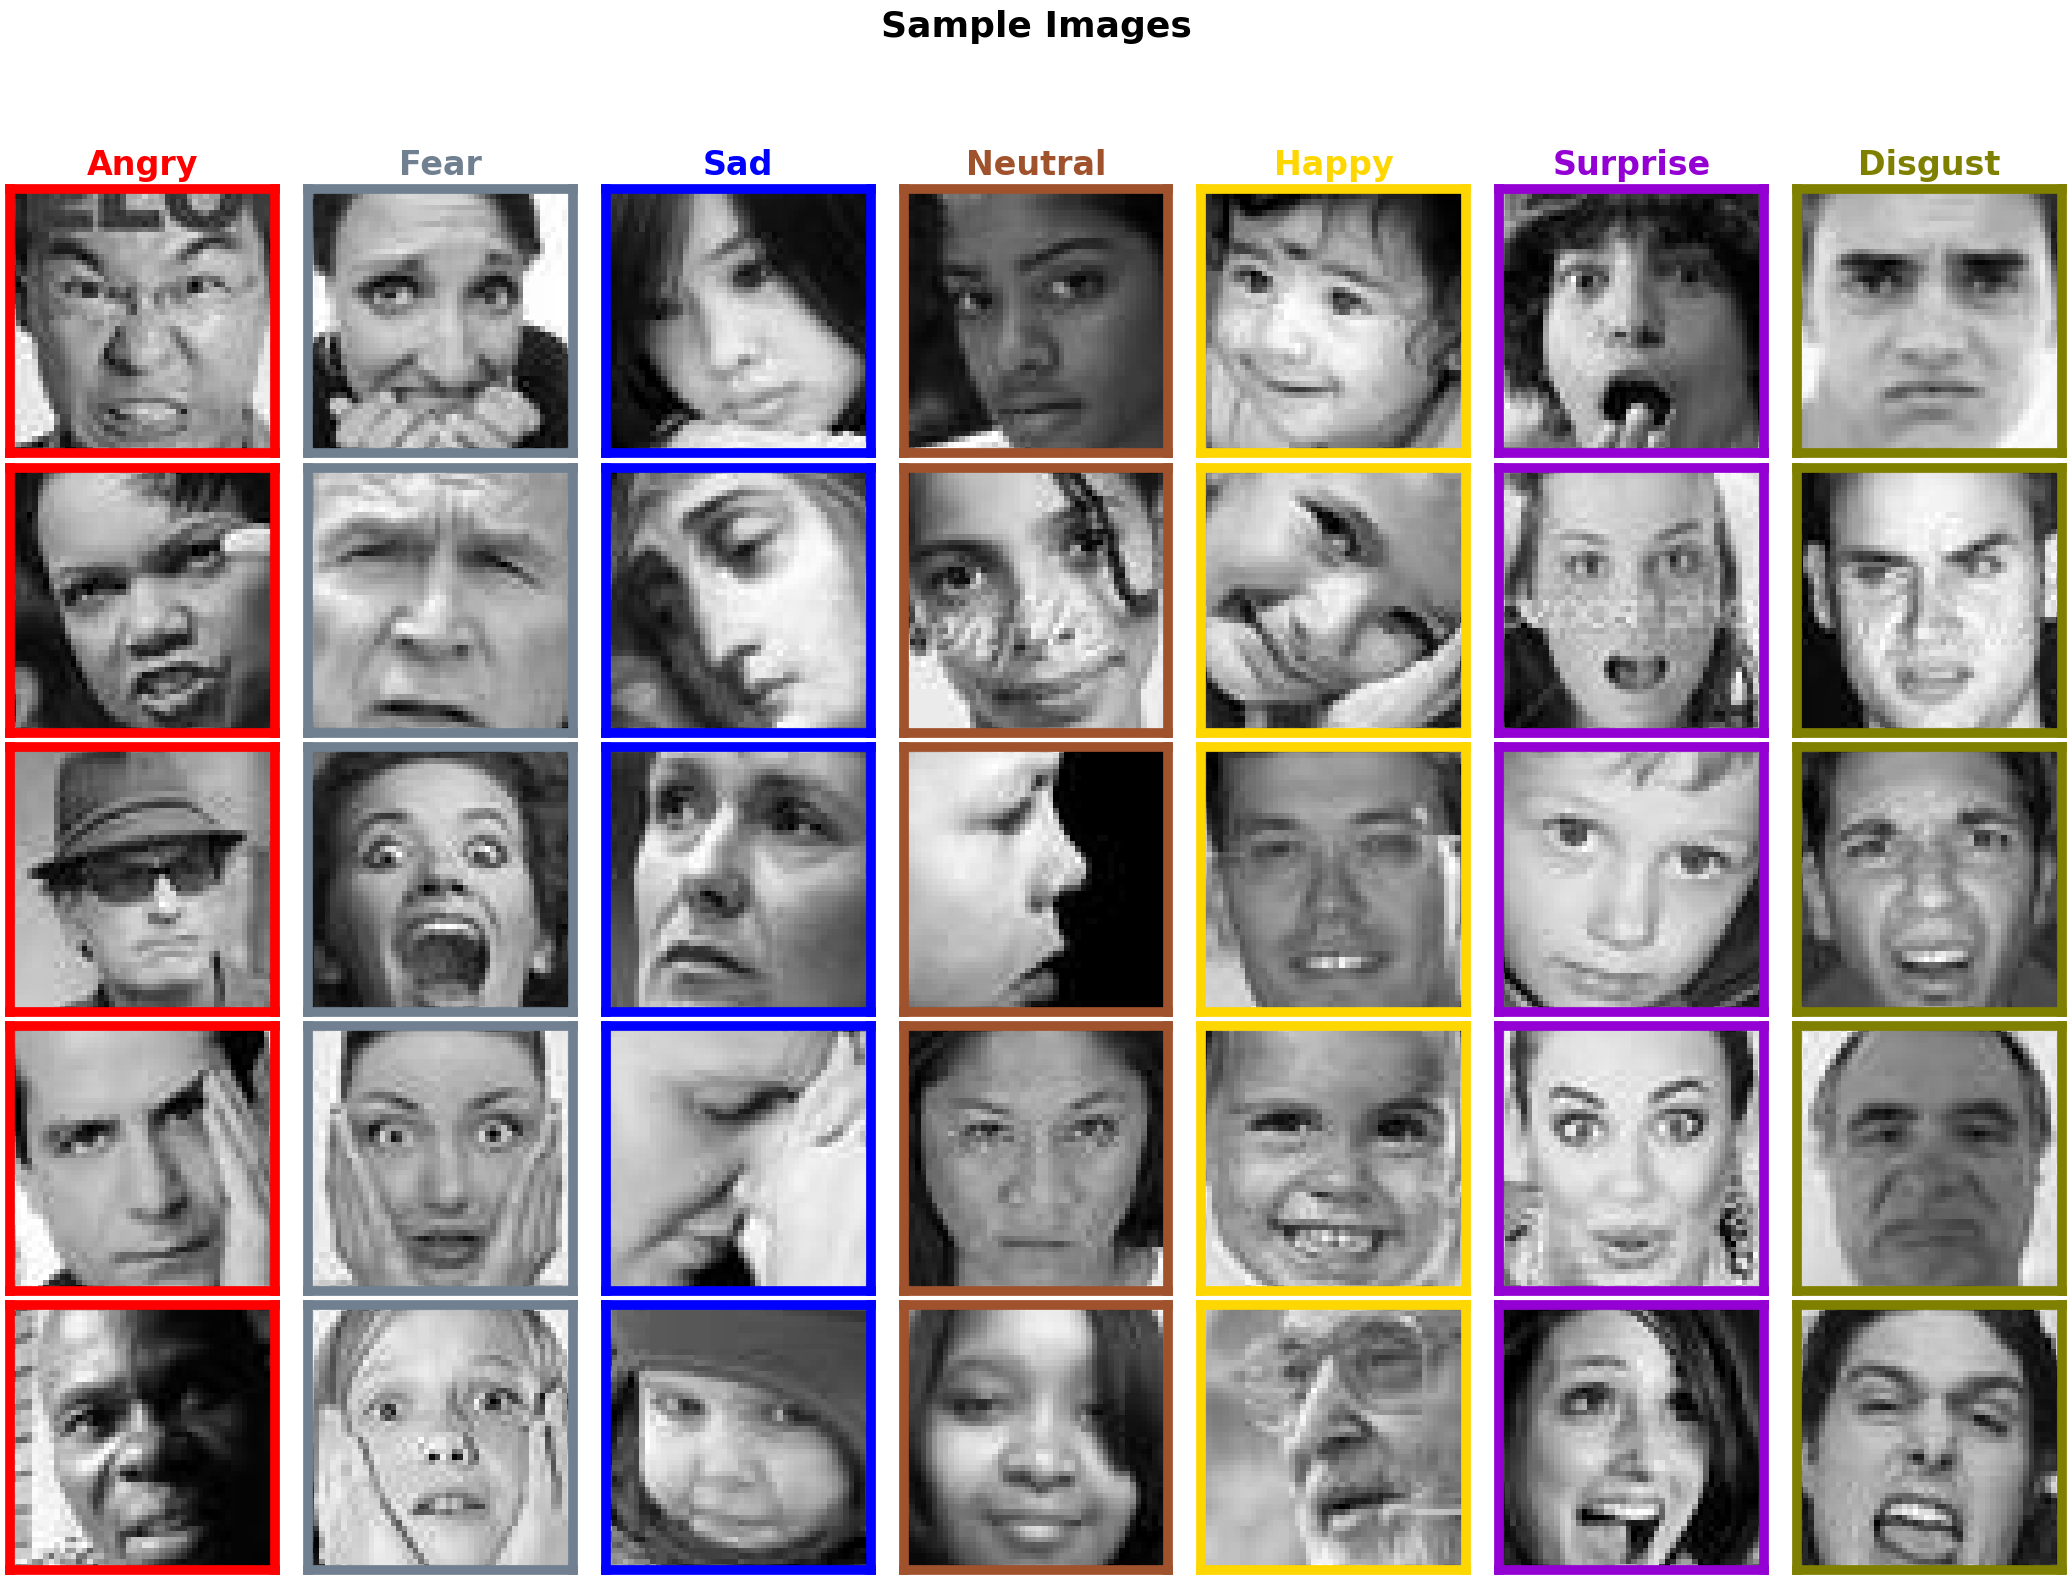

In [14]:
plot_face_matrix(
    image_dict=emo_samples, 
    row_labels=None,
    group_colors=color_dict, 
    save_path=sample_imgs_save_path,
    main_title='Sample Images'
)

In [15]:
X_train, y_train = preprocess_images(fer2013, usage='Training')

In [16]:
pixel_imgs_save_path = os.path.join('imgs', 'comparisons', 'pixel_intensities.png')

Plot saved to imgs/comparisons/pixel_intensities.png


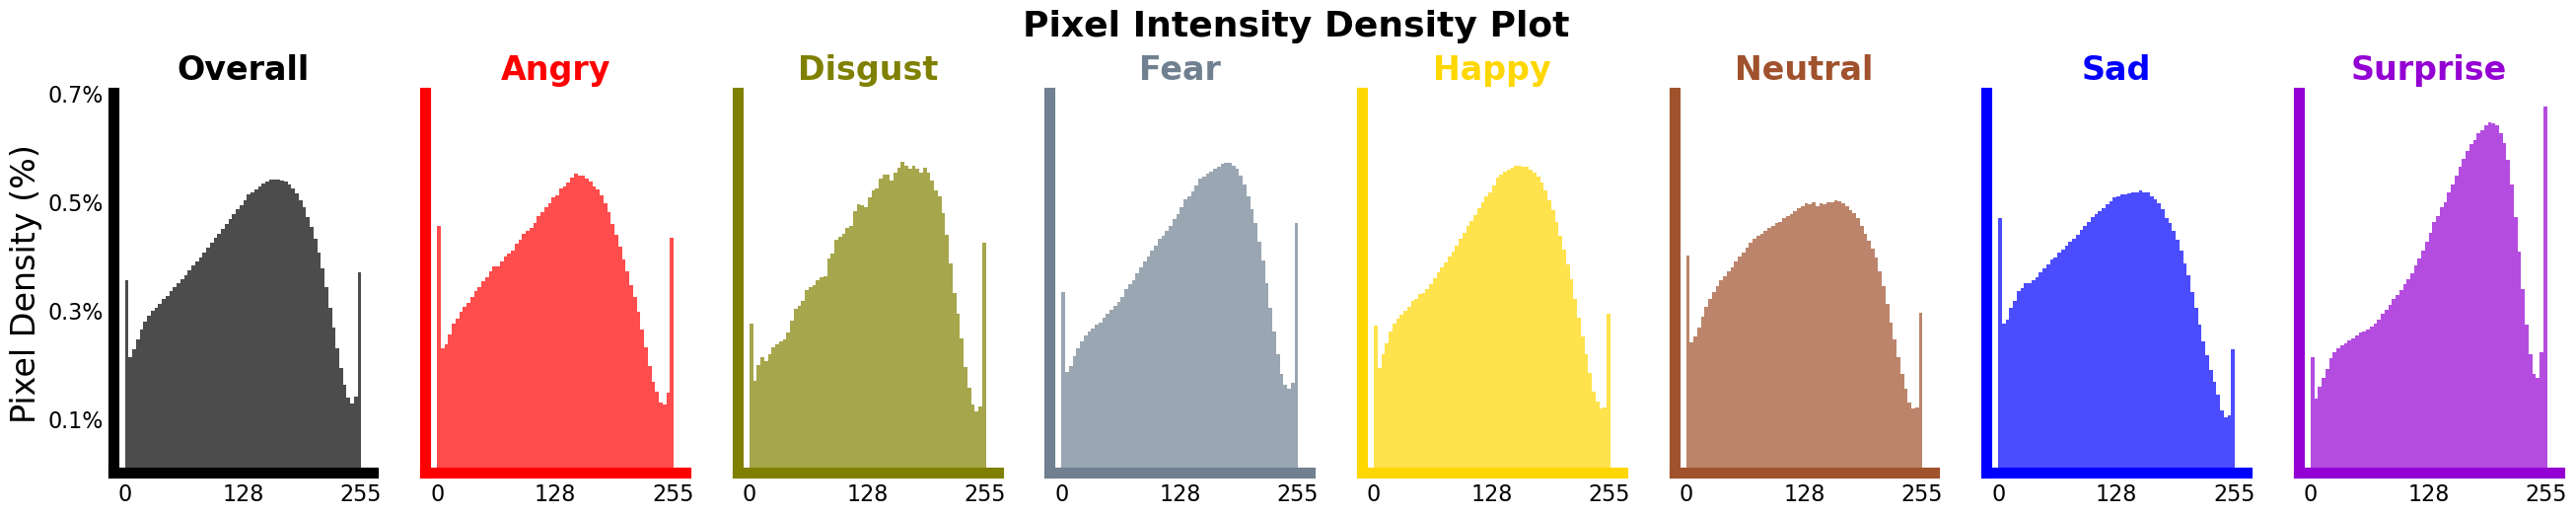

In [17]:
generate_pixel_intensities(X_train, y_train, color_dict=color_dict, save_path=pixel_imgs_save_path)

In [18]:
composite_face_dict, row_labels = generate_composite_faces(X_train, y_train, overall=True)

In [19]:
composite_imgs_save_path = os.path.join('imgs', 'comparisons', 'composite_faces.png')

Plot saved to imgs/comparisons/composite_faces.png


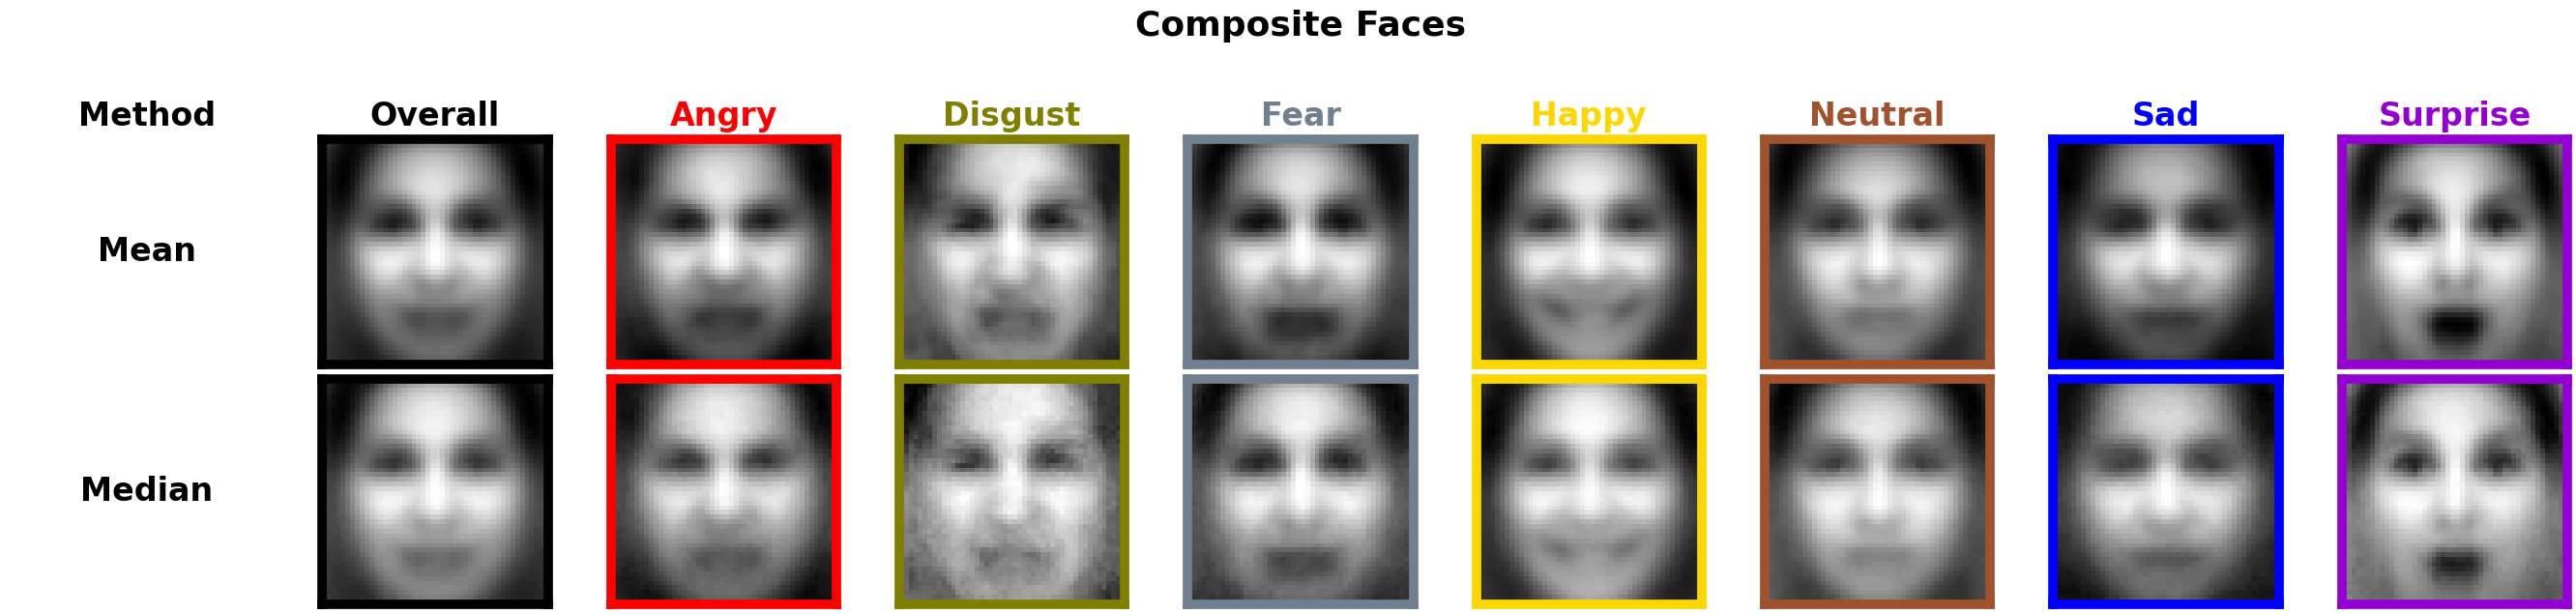

In [20]:
plot_face_matrix(
    image_dict=composite_face_dict, 
    row_labels=row_labels,
    group_colors=color_dict, 
    save_path=composite_imgs_save_path,
    main_title='Composite Faces'
)